In [1]:
pwd

'C:\\Users\\Henry\\Desktop\\my Portfolio\\Classification_Sklearn'

In [2]:
# Import Relevant libraries for the studies:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import sys
!{sys.executable} -m pip install xgboost
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import sys
from sklearn.model_selection import train_test_split
!pip install lightgbm
import lightgbm as lgb
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('IRIS.csv')

In [4]:
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
data.shape

(150, 5)

In [6]:
# check for numeric and categorical features in the datasets.
numeric_data = data.select_dtypes(include=[np.number])

In [7]:
numeric_data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
categorical_data = data.select_dtypes(include=[np.object])

In [9]:
categorical_data

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


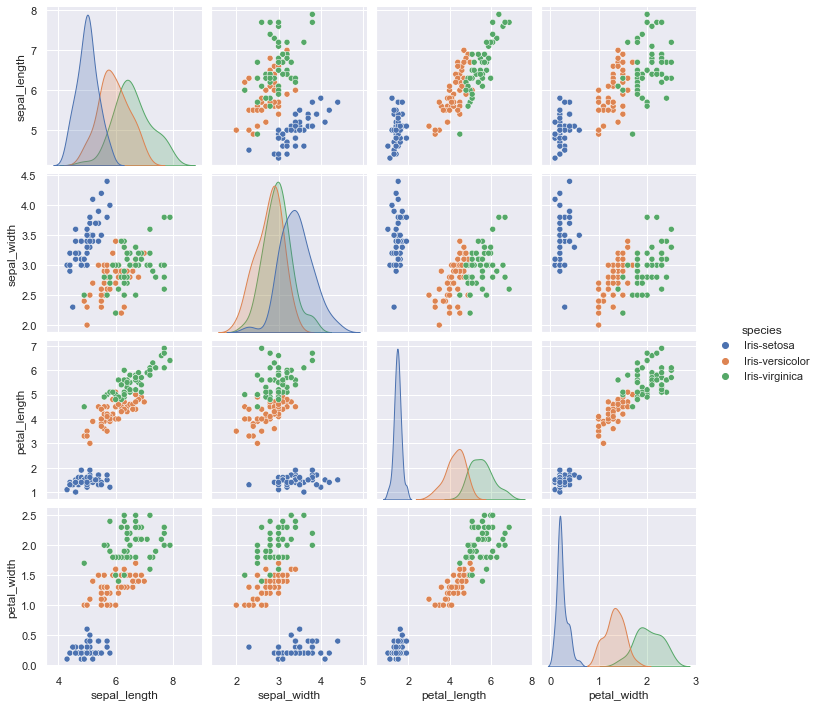

In [10]:
sns.pairplot(data,hue='species')

In [11]:
target = data['species'].unique()
target

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
target_dict = {n:i for i, n in enumerate(target)}
target_dict

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [13]:
data_y= data['species'].map(target_dict)


In [14]:
data['species_1'] = data['species'].map(target_dict)

In [15]:
data

,sepal_length,sepal_width,petal_length,petal_width,species,species_1
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [16]:
data_x = data.drop(['species','species_1'],axis = 1)
data_x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
data_x.shape ,data_y.shape

((150, 4), (150,))

In [18]:
# Data for actuall modeling
# but first use the  lightgbm to select significant features
x = data_x.copy()
y = data_y.copy()

In [19]:
data_x.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [20]:
x_features = data_x.columns.values

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(data_x)
data_x_scaled = pd.DataFrame(data=sc.transform(data_x),columns= x_features)  
x_train, x_test, y_train, y_test = train_test_split(data_x_scaled, data_y, test_size=0.25, random_state=42)

In [22]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [23]:
# Initialize an empty array to hold feature importances
feature_importances_ = np.zeros(data_x_scaled.shape[1])

In [24]:
model = lgb.LGBMClassifier()
model.fit(x_train,y_train)
# Record the feature importances
feature_importances_ += model.feature_importances_
feature_importances_

array([232., 251., 381., 288.])

In [25]:
# Make sure to average feature importances!
feature_importances = feature_importances_ / 2
feature_importances = pd.DataFrame({'feature': list(data_x_scaled.columns),'importance': feature_importances}).sort_values('importance', ascending =False)
feature_importances.head()

,feature,importance
2,petal_length,190.5
3,petal_width,144.0
1,sepal_width,125.5
0,sepal_length,116.0


In [26]:
# Find the features with zero importance
zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
feature_importances.tail()

There are 0 features with 0.0 importance


,feature,importance
2,petal_length,190.5
3,petal_width,144.0
1,sepal_width,125.5
0,sepal_length,116.0


In [27]:
# next is to ensure no multicollinearity exists.
#There are 2 ways to detect the multilinear features in the data.(1)Correlation (2)Variation Inflation factor (VIF)
# The rule of thumb is the VIF factor is greater than 10 then those features are in multicollinearity.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data_x_scaled.values, i) for i in range(data_x_scaled.shape[1])]
 
vif["features"] = data_x_scaled.columns
 
print(vif)

   VIF Factor      features
0    7.103113  sepal_length
1    2.099039   sepal_width
2   31.397292  petal_length
3   16.141564   petal_width


In [28]:
# Also confirming the multicollinearity for using the Zoomed HeatMap.
data_x_scaled_collinearity =pd.concat([data_x_scaled,data_y],axis =1)
data_x_scaled_collinearity.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0


In [29]:
correlation = data_x_scaled_collinearity.corr()
print(correlation['species'].sort_values(ascending = False),'\n')

species         1.000000
petal_width     0.956464
petal_length    0.949043
sepal_length    0.782561
sepal_width    -0.419446
Name: species, dtype: float64 



Index(['species', 'petal_width', 'petal_length', 'sepal_length',
       'sepal_width'],
      dtype='object')


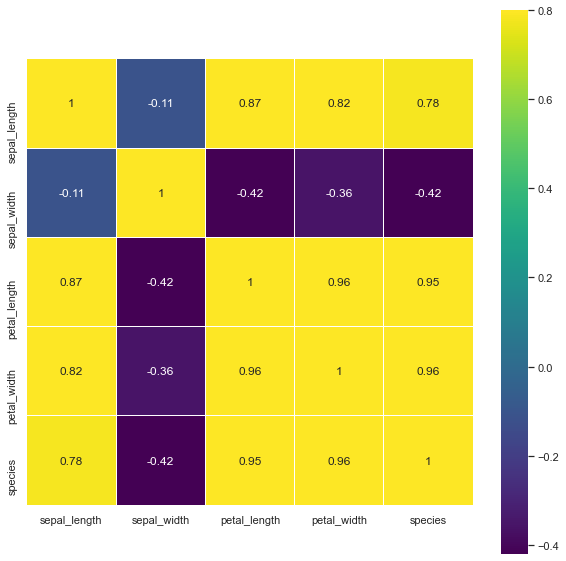

In [30]:
# Inspecting Multicollinearity using correlation.
# Zoomed HeatMap.
k= 5
cols = correlation.nlargest(k,'species')['species'].index
print(cols)
cm = np.corrcoef(data_x_scaled_collinearity.values.T)
f , ax = plt.subplots(figsize = (10,10))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = data_x_scaled_collinearity.columns ,annot_kws = {'size':12},yticklabels = data_x_scaled_collinearity.columns)
plt.show()

In [31]:
data_x_scaled = data_x_scaled.drop(['sepal_length','petal_length'], axis=1)
data_x_scaled.head(2)

,sepal_width,petal_width
0,1.032057,-1.312977
1,-0.124958,-1.312977


In [32]:
Q1 = data_x_scaled .quantile(0.25)
Q3 =data_x_scaled .quantile(0.75)
IQR = Q3 - Q1
print(IQR)

sepal_width    1.157015
petal_width    1.972095
dtype: float64


In [33]:
Check_outliers = (data_x_scaled < (Q1 - 1.5 * IQR)) |(data_x_scaled > (Q3 + 1.5 * IQR))
Check_outliers

,sepal_width,petal_width
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
145,False,False
146,False,False
147,False,False
148,False,False


In [34]:
# K-Nearest Neighbors (KNN)
# Support Vector Machine (SVM)
# Random Forest
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x_scaled, data_y, test_size=0.25, random_state=42)

In [35]:
# example of grid searching key hyperparametres for KNeighborsClassifier

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.928283 using {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.895455 (0.094548) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.895455 (0.094548) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.922475 (0.093107) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.907576 (0.089561) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.928283 (0.080857) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.913384 (0.077867) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.925505 (0.088046) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.910606 (0.084821) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.925253 (0.079809) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.910354 (0.076188) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.922727 (

In [36]:
# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

In [37]:
 data_modeling=pd.concat([data_x_scaled,data_y],axis =1 )

In [38]:
data_modeling.to_csv('data_modeling.csv',index=False)

In [39]:
# Numpy solution. We will shuffle the whole dataset first and then split our data set into the following parts:
# 60% - train set, 20% - validation set, 20% - test set

data_modeling= (data_modeling.sample(frac=1, random_state=42)) 

In [40]:
 train, validate, test = \
              np.split(data_modeling.sample(frac=1, random_state=42), 
                       [int(.6*len(data_modeling)), int(.8*len(data_modeling))])

In [41]:
train_y = train.iloc[:,-1]

In [42]:
train_x =train.drop(['species'],axis =1)

In [43]:
validate_y = validate.iloc[:,-1]

In [44]:
validate_x= validate.drop(['species'],axis =1)

In [45]:
test_y =  test.iloc[:,-1]

In [46]:
test_x= test.drop(['species'],axis =1)

In [47]:
train_x .shape, train_y.shape, validate_x.shape, validate_y.shape, test_x.shape, test_y.shape

((90, 2), (90,), (30, 2), (30,), (30, 2), (30,))

In [48]:
# The most important hyperparameter for KNN is the number of neighbors (n_neighbors in [1 to 21]),metric in [‘euclidean’, ‘manhattan’, ‘minkowski’],
# and weights in [‘uniform’, ‘distance’]

model_neigb = KNeighborsClassifier(n_neighbors =5, metric='euclidean', weights='uniform')

model_neigb.fit(train_x , train_y)
# make predictions for validation data
from sklearn.metrics import accuracy_score

predictions = model_neigb.predict(validate_x)
accuracy = accuracy_score(validate_y, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.00%


In [49]:
predictions = model_neigb.predict(test_x)
accuracy = accuracy_score(test_y, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.00%


In [50]:
predictions

array([2, 1, 0, 1, 1, 0, 2, 0, 2, 0, 0, 1, 0, 1, 0, 1, 2, 2, 2, 1, 0, 1,
       1, 2, 0, 0, 2, 0, 2, 0], dtype=int64)

In [51]:
# Support Vector Machine (SVM)
# kernels in [‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’], Penalty C in [100, 10, 1.0, 0.1, 0.001],
# example of grid searching key hyperparametres for SVC

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(train_x, train_y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.966667 using {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.955556 (0.061531) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.966667 (0.058443) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.844444 (0.130210) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.966667 (0.050918) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.962963 (0.066254) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.855556 (0.128780) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.937037 (0.068393) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.966667 (0.058443) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.940741 (0.074444) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.937037 (0.074167) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.933333 (0.084132) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.888889 (0.111111) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.537037 (0.099725) with: {'C': 0.01, 'gamma': 'scale', 

In [52]:
model_svc = SVC(gamma = 'scale', kernel='rbf', C= 50,)

model_svc.fit(train_x , train_y)
# make predictions for validation data
from sklearn.metrics import accuracy_score

predictions = model_svc.predict(validate_x)
accuracy = accuracy_score(validate_y, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.00%


In [53]:
predictions = model_svc.predict(test_x)
accuracy = accuracy_score(test_y, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.33%


In [54]:
# Bagged Decision Trees (Bagging)
# The most important parameter for bagged decision trees is the number of trees (n_estimators).n_estimators in [10, 100, 1000]
# example of grid searching key hyperparameters for BaggingClassifier

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier()
n_estimators = [10, 100, 1000]
# define grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(train_x , train_y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))



Best: 0.959259 using {'n_estimators': 100}
0.955556 (0.067890) with: {'n_estimators': 10}
0.959259 (0.067179) with: {'n_estimators': 100}
0.959259 (0.067179) with: {'n_estimators': 1000}


In [55]:
model_Bagg = BaggingClassifier(n_estimators = 10)
model_Bagg.fit(train_x , train_y)
# make predictions for validation data
from sklearn.metrics import accuracy_score

predictions = model_Bagg.predict(validate_x)
accuracy = accuracy_score(validate_y, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 90.00%


In [56]:
predictions = model_Bagg.predict(test_x)
accuracy = accuracy_score(test_y, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.33%


In [57]:
# Random Forest
# max_features [1 to 20], n_estimators in [10, 100, 1000]

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(train_x , train_y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.959259 using {'max_features': 'log2', 'n_estimators': 100}
0.951852 (0.084539) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.951852 (0.074167) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.951852 (0.084539) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.955556 (0.073703) with: {'max_features': 'log2', 'n_estimators': 10}
0.959259 (0.067179) with: {'max_features': 'log2', 'n_estimators': 100}
0.951852 (0.084539) with: {'max_features': 'log2', 'n_estimators': 1000}


In [58]:
model_Random = RandomForestClassifier(max_features ='log2',n_estimators = 10 )

model_Random .fit(train_x , train_y)
# make predictions for validation data
from sklearn.metrics import accuracy_score

predictions = model_Random .predict(validate_x)
accuracy = accuracy_score(validate_y, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))



Accuracy: 90.00%


In [59]:
predictions = model_Random.predict(test_x)
accuracy = accuracy_score(test_y, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.33%


In [60]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(train_x , train_y)

predictions = model.predict(validate_x)
accuracy = accuracy_score(validate_y, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


[01:09:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 90.00%


In [61]:
predictions = model.predict(test_x)
accuracy = accuracy_score(test_y, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.33%
